Generate STLAB modulations
==========================

"f2dur60.dsf" saved in the current working directory.
"f1dur60.dsf" saved in the current working directory.
"f0.5dur60.dsf" saved in the current working directory.
"f0.1dur60.dsf" saved in the current working directory.
"f0.05dur60.dsf" saved in the current working directory.
"f0.01dur60.dsf" saved in the current working directory.


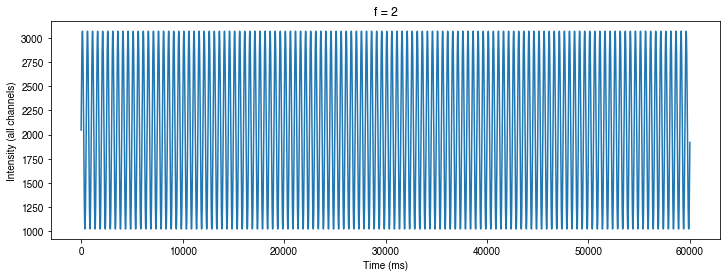

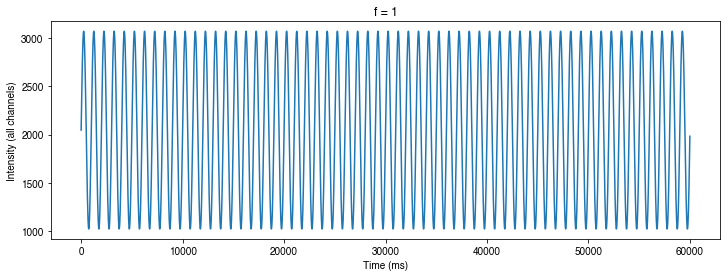

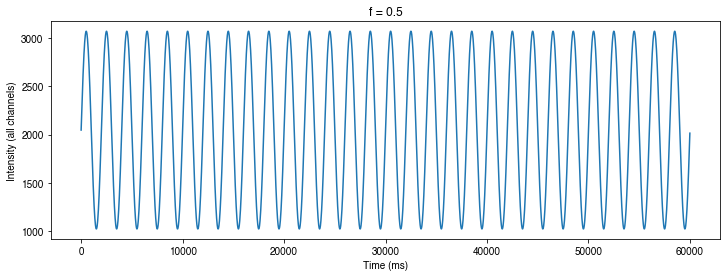

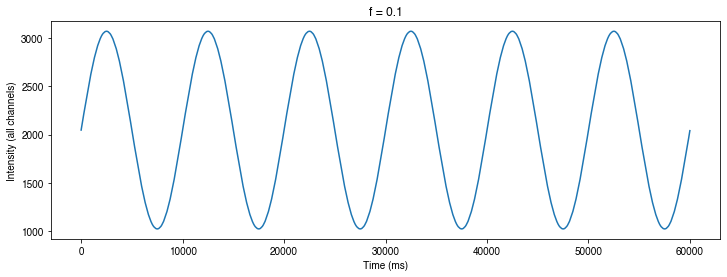

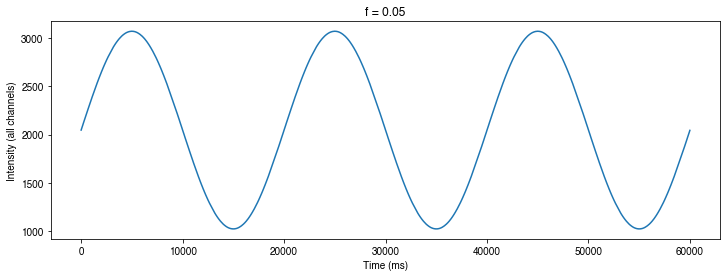

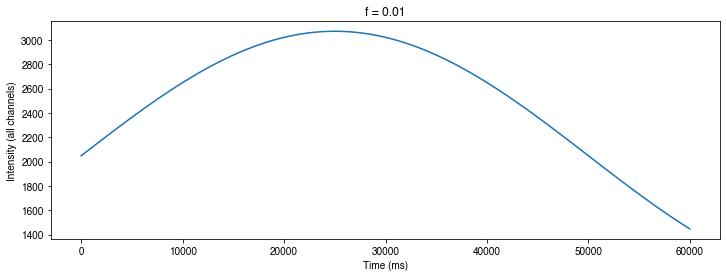

In [22]:
"""
Created on Fri Oct  8 11:39:05 2021

@author: jtm545
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pyplr import stlab 


def get_sinusoid_time_vector(duration):
    t = np.arange(0, (duration * 1000), 10).astype("int")
    return t


def sinusoid_modulation(f, duration, Fs=100):
    x  = np.arange(duration * Fs)
    sm = np.sin(2 * np.pi * f * x / Fs)
    return sm


def modulate_intensity_amplitude(sm, background, amplitude):
    ivals = (background + (sm * amplitude)).astype("int")
    return ivals


# STLAB params
Fs = 100 #  STLAB has a spectral switching time of 10 ms (100 spectra / s)
mintensity = 0
maxtensity = 4095

# Stimulus params
background  = maxtensity/2
amplitude   = maxtensity/4
frequencies = [2, 1, 0.5, 0.1, 0.05, 0.01]
duration = 60 # s

# Make the stimuli
for freq in frequencies:
    
    # Time vector for dsf file
    time = get_sinusoid_time_vector(duration)
    
    # Sinusoidal modulation for led channel
    sm = sinusoid_modulation(freq, duration, Fs)
    
    # Get intensity values. Here we simply modulate the intensity of 
    # all channels in an equal fashion. 
    ivals = modulate_intensity_amplitude(sm, background, amplitude)
    
    # Plot
    fig, ax = plt.subplots(figsize=(12,4))
    ax.plot(time, ivals)
    ax.set_ylabel("Intensity (all channels)")
    ax.set_xlabel("Time (ms)")
    ax.set_title(f"f = {freq}")

    # Make video files
    cols = stlab.get_video_cols()
    data = [ivals for x in range(10)]
    data.insert(0, time)
    df = pd.DataFrame(data, cols).T
    df = df.append(stlab._video_file_end(duration*1000)).reset_index(drop=True)  # Otherwise it doesn't end...
    df = df.append(stlab._video_file_end(duration*1000+100)).reset_index(drop=True)  # Otherwise it doesn't end...
    fname = f"f{str(freq)}dur{str(duration)}"
    
    # We put important information about the stimulus inside the 
    # videofiles metadata because the filenames get changed when
    # they are uploaded
    metadata = {  
        'frequency': freq, 
        'duration': duration
        }
    stlab.make_video_file(df, fname, **metadata)


"f2dur60.dsf" saved in the current working directory.
"f1dur60.dsf" saved in the current working directory.
"f0.5dur60.dsf" saved in the current working directory.
"f0.1dur60.dsf" saved in the current working directory.
"f0.05dur60.dsf" saved in the current working directory.
"f0.01dur60.dsf" saved in the current working directory.


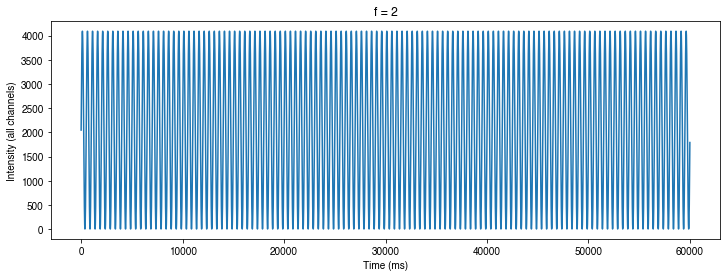

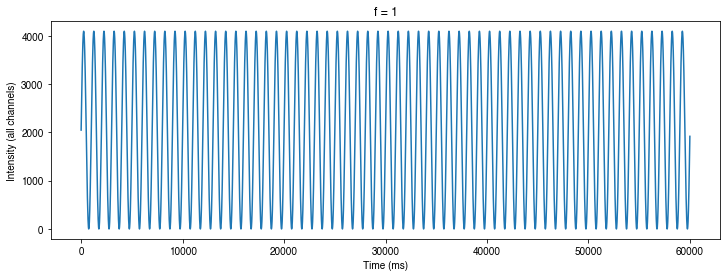

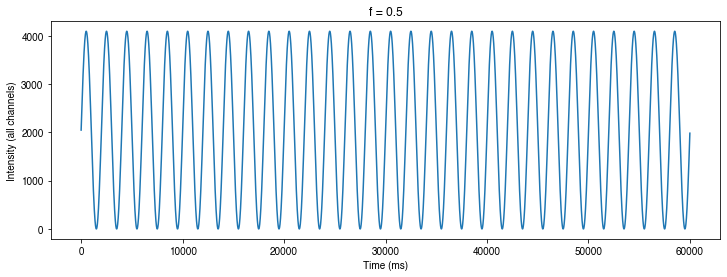

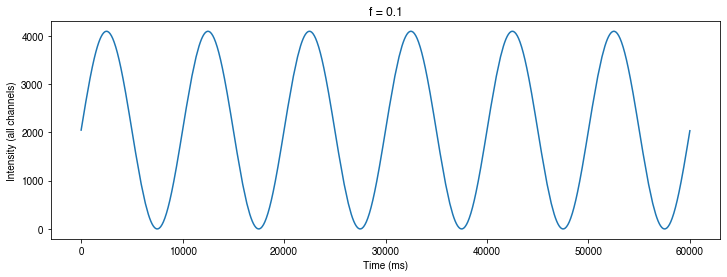

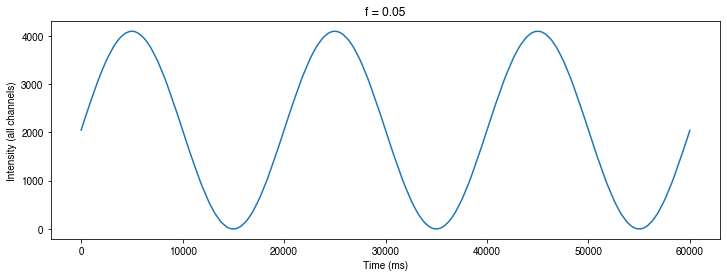

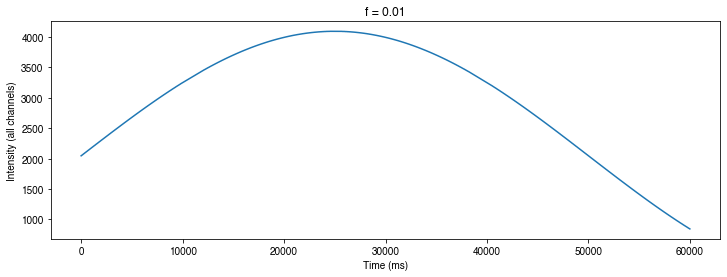

In [36]:
"""
Created on Fri Oct  8 11:39:05 2021

@author: jtm545
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pyplr import stlab 


def get_sinusoid_time_vector(duration):
    t = np.arange(0, (duration * 1000), 10).astype("int")
    return t


def sinusoid_modulation(f, duration, Fs=100):
    x  = np.arange(duration * Fs)
    sm = np.sin(2 * np.pi * f * x / Fs)
    return sm


def modulate_intensity_amplitude(sm, background, amplitude):
    ivals = (background + (sm * amplitude)).astype("int")
    return ivals


# STLAB params
Fs = 100 #  STLAB has a spectral switching time of 10 ms (100 spectra / s)
mintensity = 0
maxtensity = 4095

# Stimulus params
background  = maxtensity/2
amplitude   = maxtensity/2
frequencies = [2, 1, 0.5, 0.1, 0.05, 0.01]
duration = 60 # s
channel = 'all'

# Make the stimuli
for freq in frequencies:
    
    # Time vector for dsf file
    time = get_sinusoid_time_vector(duration)
    
    # Sinusoidal modulation for led channel
    sm = sinusoid_modulation(freq, duration, Fs)
    
    # Get intensity values. Here we simply modulate the intensity of 
    # all channels in an equal fashion. 
    ivals = modulate_intensity_amplitude(sm, background, amplitude)
    
    # Plot
    fig, ax = plt.subplots(figsize=(12,4))
    ax.plot(time, ivals)
    ax.set_ylabel("Intensity (all channels)")
    ax.set_xlabel("Time (ms)")
    ax.set_title(f"f = {freq}")

    # Make video files
    cols = stlab.get_video_cols()
    if channel == 'all':
        data = [ivals for x in range(10)]
    else:
        data = [[0 for val in range(len(ivals))] for x in range(10)]
        data[channel] = ivals
    data.insert(0, time)
    df = pd.DataFrame(data, cols).T
    df = df.append(stlab._video_file_end(duration*1000)).reset_index(drop=True)  # Otherwise it doesn't end...
    df = df.append(stlab._video_file_end(duration*1000+100)).reset_index(drop=True)  # Otherwise it doesn't end...
    fname = f"f{str(freq)}dur{str(duration)}"
    
    # We put important information about the stimulus inside the 
    # videofiles metadata because the filenames get changed when
    # they are uploaded
    metadata = {  
        'frequency': freq, 
        'duration': duration,
        'channel': channel
        }
    stlab.make_video_file(df, fname, **metadata)


In [34]:
df

,time,LED-1,LED-2,LED-3,LED-4,LED-5,LED-6,LED-7,LED-8,LED-9,LED-10
0,0,0,0,0,0,0,0,0,0,0,2047
1,10,0,0,0,0,0,0,0,0,0,2048
2,20,0,0,0,0,0,0,0,0,0,2050
3,30,0,0,0,0,0,0,0,0,0,2051
4,40,0,0,0,0,0,0,0,0,0,2052
...,...,...,...,...,...,...,...,...,...,...,...
5999,59990,0,0,0,0,0,0,0,0,0,845
6000,60000,0,0,0,0,0,0,0,0,0,0
6001,60100,0,0,0,0,0,0,0,0,0,0
6002,60100,0,0,0,0,0,0,0,0,0,0


array([    0,    10,    20, ..., 59970, 59980, 59990])